In [1]:
import cv2
import sys
import torch

from omegaconf import OmegaConf
from PIL import Image
from tqdm.notebook import tqdm

In [2]:
sys.path.append('../src')

In [3]:
from train import create_dataset
from data.loader import fast_collate
from data.sampler import CustomSampler

In [4]:
conf = OmegaConf.load('../config/train.yaml')
ds = create_dataset(conf.data.train, conf.data.train.transforms, show_progress=True)

Parsing bboxes...:   0%|          | 0/2793 [00:00<?, ?it/s]

Loading train data...


Parsing bboxes...: 100%|██████████| 2793/2793 [00:16<00:00, 166.09it/s]

train: 27781 images


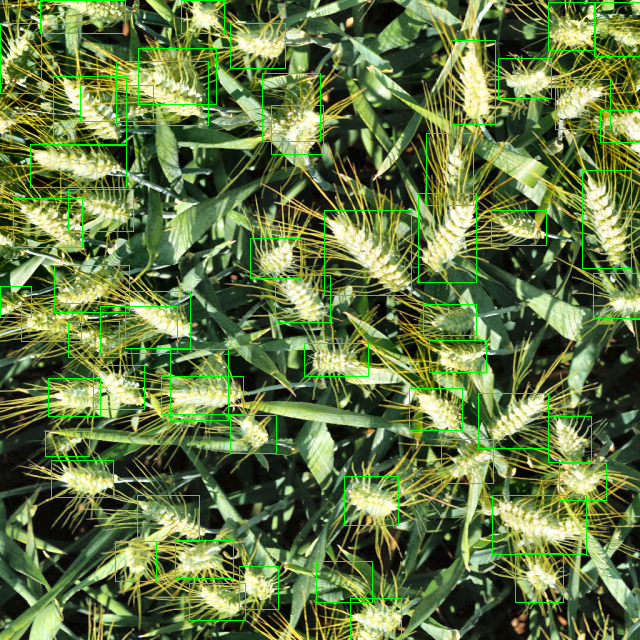

In [5]:
i = 300
image, target = ds[i]
bboxes = target['bbox']

for bb in bboxes:
    p1 = tuple(bb[:2].astype(int))
    p2 = tuple(bb[2:].astype(int))
    cv2.rectangle(image, p1, p2, (0, 255, 0), 1)

Image.fromarray(image)

In [6]:
sampler = CustomSampler(ds, orig_images_ratio=0.5)
dl = torch.utils.data.DataLoader(ds, sampler=sampler, batch_size=8, collate_fn=fast_collate)

In [8]:
for batch in tqdm(iter(dl), total=len(dl)):
    pass

/home/dmitry/anaconda3/envs/latest/lib/python3.7/site-packages/ipykernel_launcher.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """Entry point for launching an IPython kernel.
